In [1]:
import rtpipe
import numpy as np
import pylab as pl
import logging
from IPython.display import Image
import glob

logger = logging.getLogger()
for hdlr in logger.handlers:
    logger.removeHandler(hdlr)
logging.basicConfig()

%matplotlib inline

In [4]:
sdmname = '12A-336_sb9667618_1b.56040.87127945602'
scan = 5
d = rtpipe.RT.set_pipeline(sdmname, scan, maxdm=200, dtarr=[1,2,4],
                           spw=[0,1], chans=range(5,59)+range(69,121), timesub='mean',
                           searchtype='image1stats', sigma_image1=7, sigma_plot=8,
                           logfile=True, memory_limit=1.5, nthread=4, uvoversample=1.5, applyonlineflags=False,
                           savecands=True, savenoise=True)

INFO:rtpipe.parsesdm:Calculating uvw for first integration of scan 5 of source J0628+09
INFO:rtpipe.parsesdm:

INFO:rtpipe.parsesdm:Metadata summary:
INFO:rtpipe.parsesdm:	 Working directory and data at /Users/caseyjlaw/code/reproducing-fast-imaging-rrats, 12A-336_sb9667618_1b.56040.87127945602
INFO:rtpipe.parsesdm:	 Using scan 5, source J0628+09
INFO:rtpipe.parsesdm:	 nants, nbl: 25, 300
INFO:rtpipe.parsesdm:	 Freq range (1.258 -- 1.488). 2 spw with 106 chans.
INFO:rtpipe.parsesdm:	 Scan has 23930 ints (239.3 s) and inttime 0.010 s
INFO:rtpipe.parsesdm:	 2 polarizations: ['RR', 'LL']
INFO:rtpipe.parsesdm:	 Ideal uvgrid npix=(864,576) and res=52 (oversample 1.5)
INFO:rtpipe:Autodetected telcal file /Users/caseyjlaw/code/reproducing-fast-imaging-rrats/12A-336_sb9667618_1b.56040.87127945602.GN
INFO:rtpipe:Calculated 15 dms for max sensitivity loss 0.05, maxdm 200 pc/cm3, and pulse width 3 ms
INFO:rtpipe:Over memory limit of 1.5 when reading 31 segments with 4 chunks (1.48791074753/2.9069

In [5]:
rtpipe.RT.pipeline(d, 11)
rtpipe.parsecands.merge_segments(sdmname, scan)

INFO:rtpipe:Starting search of /Users/caseyjlaw/code/reproducing-fast-imaging-rrats/12A-336_sb9667618_1b.56040.87127945602, scan 5, segments [11]
INFO:rtpipe.parsesdm:Reading scan 5, segment 11/92, times 21:03:06.138 to 21:03:08.849
INFO:rtpipe.parsesdm:Reading 271 ints starting at int 2828
INFO:rtpipe.parsesdm:Not applying online flags.
INFO:rtpipe.parsesdm:Calculating uvw at 2012/04/23/21:03:07.493 for scan 5 of source J0628+09
INFO:rtpipe.parsecal:Read telcalfile /Users/caseyjlaw/code/reproducing-fast-imaging-rrats/12A-336_sb9667618_1b.56040.87127945602.GN
INFO:rtpipe.parsecal:Applying gain solution for chans from 0-52
INFO:rtpipe.parsecal:Frequency selection cut down to 100 solutions
INFO:rtpipe.parsecal:Selection down to 100 solutions separated from given time by 19 minutes
INFO:rtpipe.parsecal:MJD: [ 56040.89067766]
INFO:rtpipe.parsecal:Source: ['0542+498=3C147']
INFO:rtpipe.parsecal:Solutions for 2 spw: ([ 1312.  1440.])
INFO:rtpipe.parsecal:Applying gain solution for chans from

Gridded 1.000 of data. Scaling fft by = 8.8
Pixel sizes (9.2", 13.8"), Field size 3966.6"


INFO:rtpipe:Made image with SNR min, max: -4.2, 28.4
INFO:rtpipe:Rephasing data to (l, m)=(0.0002, 0.0001).
INFO:rtpipe.reproduce:Plotting...
INFO:rtpipe.reproduce:Peak (RA, Dec): 6 28 36.1001203345, 9 9 13.7730326916
INFO:rtpipe:Found 97 cands in scan 5 segment 11 of /Users/caseyjlaw/code/reproducing-fast-imaging-rrats/12A-336_sb9667618_1b.56040.87127945602. 
INFO:rtpipe:Saving 97 candidates for segment 11...


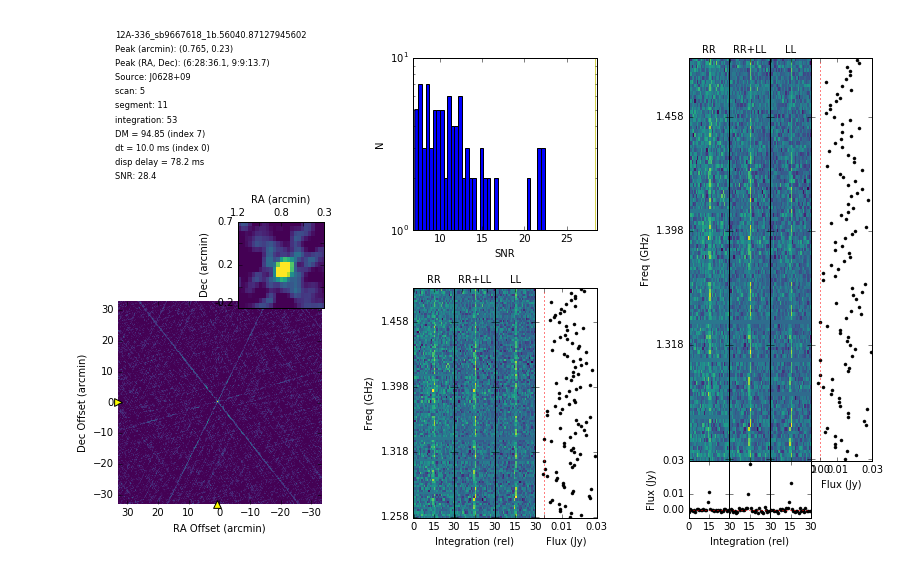

In [7]:
Image(filename=glob.glob('cands_{0}_sc{1}*.png'.format(sdmname, scan))[0])